In [1]:
# import libraries
import time
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


In [2]:

# Define the function to test
def func_to_test(n):
    x = 1
    for i in range(1, n+1):
        for j in range(1, n+1):
            x += 1
    return x

In [3]:
# Time the function for various n
def time_function(n):
    start_time = time.perf_counter()
    func_to_test(n)
    end_time = time.perf_counter()
    return end_time - start_time


In [4]:

# Varying n from 1 to 1000 with step 2 for visualization
n_values = np.arange(1, 1001, 2)
times = [time_function(n) for n in n_values]


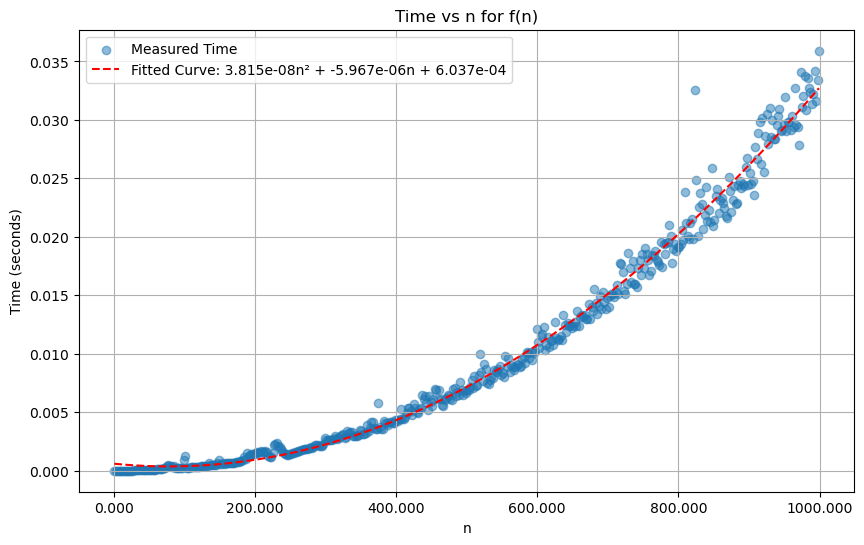

In [13]:

# Plot the chart for "time" vs "n"
plt.figure(figsize=(10, 6))
plt.scatter(n_values, times, label='Measured Time', alpha=0.5)
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time vs n for f(n)')
plt.grid(True)

# Fit a curve (polynomial of degree 2 is expected)
coefficients = np.polyfit(n_values, times, 2)
polynomial = np.poly1d(coefficients)

# Plot the polynomial fit
x_fit = np.logspace(np.log10(n_values[0]), np.log10(n_values[-1]), num=1000)
plt.plot(x_fit, polynomial(x_fit), 
         label=f'Fitted Curve: {coefficients[0]:.3e}n² + {coefficients[1]:.3e}n + {coefficients[2]:.3e}', 
         linestyle='--', color='red')

plt.legend()
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
plt.show()



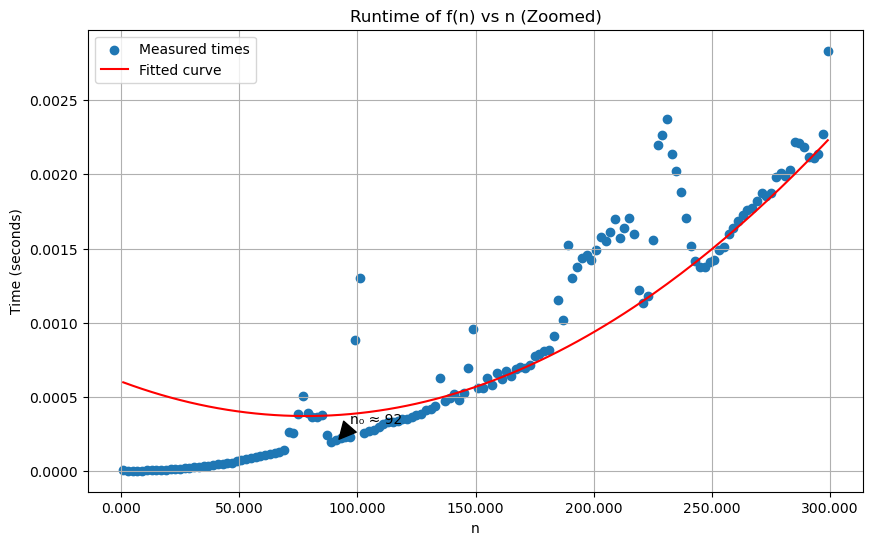

In [14]:
# Plot for small n values to find n₀
# Adjust 150 to include the range inorder to examine
small_n_values = n_values[:150]
# Corresponding times
small_times = times[:150]  

plt.figure(figsize=(10, 6))
plt.scatter(small_n_values, small_times, label='Measured times')
plt.plot(small_n_values, polynomial(small_n_values), 'r-', label='Fitted curve')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Runtime of f(n) vs n (Zoomed)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

# Add annotation for n₀
n0 = 92  # This is an estimate, adjust based on current observations
plt.annotate('n₀ ≈ 92', xy=(n0, time_function(n0)), xytext=(n0+5, time_function(n0)*1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()



## Implementing Merge Sort

In [15]:
# Implementing merge sort
def merge_sort(array):
    if len(array) > 1:
        # Find the middle of the array
        mid = len(array) // 2  
        # Divide the array into two halves
        left_half = array[:mid]  
        right_half = array[mid:]

        # Recursively sort the left half
        merge_sort(left_half)  
        # Recursively sort the right half
        merge_sort(right_half) 

        # Merging process
        i = j = k = 0

        # Merge the sorted halves into the original array
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                array[k] = left_half[i]
                i += 1
            else:
                array[k] = right_half[j]
                j += 1
            k += 1

        # Copy the remaining elements of left_half, if any
        while i < len(left_half):
            array[k] = left_half[i]
            i += 1
            k += 1

        # Copy the remaining elements of right_half, if any
        while j < len(right_half):
            array[k] = right_half[j]
            j += 1
            k += 1

# Test the merge sort on the array 
test_array = [5, 27, 40, 17, 31, 3, 39, 50]
merge_sort(test_array)
print(test_array)


[3, 5, 17, 27, 31, 39, 40, 50]
